# <a href="https://colab.research.google.com/github/tvml/ml2021/blob/main/codici/BetaBernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [1]:
#%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#!pip install xarray
import xarray

In [56]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [4]:
theta_real = 0.36
n_trials = 100000

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [5]:
data = stats.bernoulli.rvs(theta_real, size=n_trials)

In [6]:
data

array([0, 1, 0, ..., 0, 0, 1])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui la prior (e di conseguenza la posterior) sono distribuzioni Beta. 

![Diagramma modello beta-bernoulli.](assets/betabernoulli.png)

In [7]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
alpha = 10
beta = 10
hyper = [alpha, beta]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [8]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 100000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Plot della distribuzione a priori di $\theta$

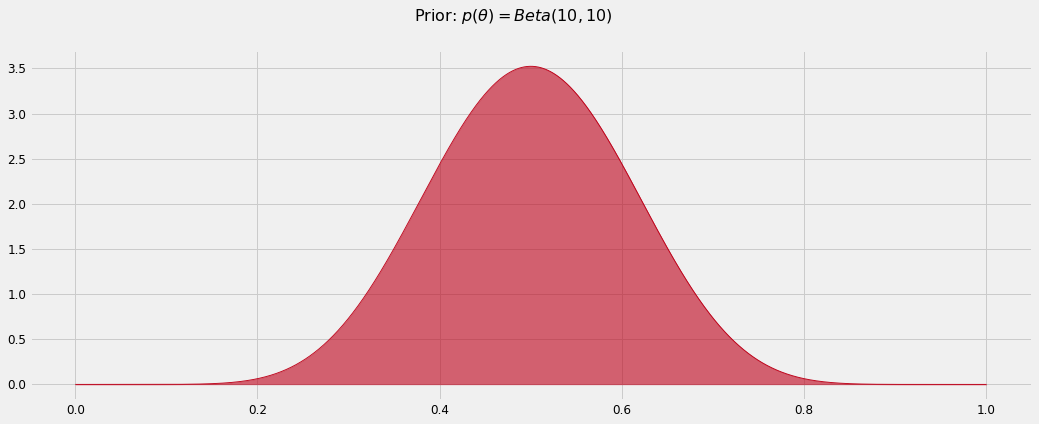

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
# testo sull'asse x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout
# titolo della figura
plt.suptitle(r'Prior: $p(\theta)=Beta({0:3d}, {1:3d})$'.format(alpha, beta), fontsize=16)
plt.show()

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [10]:
n = 50

In [11]:
# determina numero di esiti pari a 1
ones = data[:n].sum()
# modifica i parametri della distribuzione per tener conto degli esiti osservati
params = [sum(t) for t in zip(hyper, [ones, n-ones])]
# calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
post = dist.pdf(x, *params)
# calcola il valore sulla griglia per cui la distribuzione a posteriori è massima
mp = x[np.argmax(post)]
# calcola elenco dei valori per la verosimiglianza con la probabilità considerata
lik = [p**ones*(1-p)**(n-ones) for p in x]
# calcola il valore sulla griglia per cui la verosimiglianza è massima
ml = x[np.argmax(lik)]
# calcola il valore dell'evidenza
ev = np.sum(list(map(lambda x,y:x*y/float(nv), lik, yp)))

Visualizza la distribuzione a priori, la verosimiglianza e la distribuzione a posteriori per il numero di osservazioni considerato

In [12]:
def plot_dist():
    fig, ax = plt.subplots(figsize=(16,10))
    ax=plt.subplot(2,1,1)
    ax.plot(x, lik, '-', c=colors[1], linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, lik, color=colors[1], alpha=0.3)
    # testo sull'asse x
    plt.xlabel(r"$\theta$",fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Likelihood; ML={0:8.5f}'.format(ml), fontsize=14)
    ax=plt.subplot(2,1,2)
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax.plot(x, post, '-', c=colors[3], linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, post, color=colors[3], alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
    plt.annotate(r'Evidence; $p(X)={0:10.3e}$'.format(ev), xy=(.05, .85), va='top', xycoords='axes fraction', 
                 fontsize=14)
    # testo sull'asse x
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(r'Posterior; $p(\theta|X)=Beta({0:3d}, {1:3d})\qquad$ MAP={2:8.5f}'.format(params[0],params[1],mp), fontsize=14)
    #plt.tight_layout
    # titolo della figura
    plt.suptitle(r'$\theta={0:3.2f}\qquad n={1:3d}\qquad\#1={2:3d}\quad \#0={3:3d}$'.format(theta_real, 
                                                    n, ones, n-ones), fontsize=16)
    plt.show()

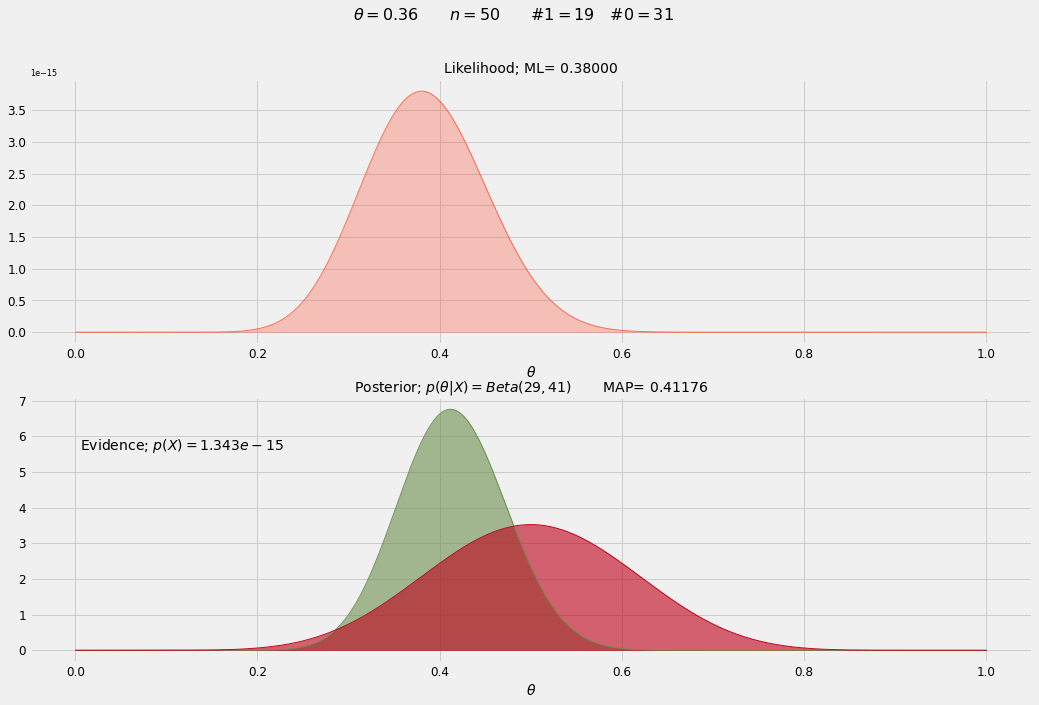

In [13]:
plot_dist()

In [14]:
import pymc3 as pm
import arviz as az
import seaborn as sns

In [26]:
with pm.Model() as model:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.


In [36]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    theta    (chain, draw) float64 0.3593 0.3603 0.3603 ... 0.3619 0.3606 0.3583
Attributes:
    created_at:                 2021-03-22T18:49:03.990850
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.0
    sampling_time:              25.417119026184082
    tuning_steps:               1000

In [120]:
trace.posterior.theta[1,:]

<xarray.DataArray 'theta' (draw: 1000)>
array([0.36012335, 0.35917074, 0.35931467, 0.3623206 , 0.36018654,
       0.35926199, 0.35915771, 0.35980305, 0.35954865, 0.35791057,
       0.35791057, 0.35915795, 0.35658487, 0.35713623, 0.35648259,
       0.35773353, 0.36075414, 0.35777298, 0.36156051, 0.36033128,
       0.35871573, 0.35984745, 0.35922931, 0.35883717, 0.36032479,
       0.36033196, 0.36033196, 0.36224767, 0.36176717, 0.35745899,
       0.35927096, 0.357748  , 0.36121349, 0.36148938, 0.36063646,
       0.36283783, 0.35672869, 0.35775392, 0.35671183, 0.35924754,
       0.35851071, 0.35869459, 0.35869459, 0.36047871, 0.36123585,
       0.36123585, 0.36086267, 0.36040812, 0.3600099 , 0.36090165,
       0.36148242, 0.36117783, 0.36137736, 0.35820622, 0.35851147,
       0.35886047, 0.35886047, 0.35870232, 0.3586642 , 0.36057228,
       0.35786058, 0.36080353, 0.36046538, 0.35841681, 0.36092221,
       0.36177328, 0.35785095, 0.35876511, 0.35983529, 0.35937972,
       0.35921953, 0.3584348 , 0.35772411, 0.35772411, 0.3568453 ,
       0.35880816, 0.35880816, 0.35796177, 0.35876541, 0.35940456,
       0.3573965 , 0.35677321, 0.35849276, 0.36048277, 0.36048277,
       0.35840847, 0.35855794, 0.35944717, 0.35851781, 0.35851781,
       0.35851781, 0.35831715, 0.35939186, 0.36161142, 0.35987096,
       0.35927131, 0.35798809, 0.35822306, 0.35677642, 0.35809567,
...
       0.36017445, 0.35981198, 0.36096618, 0.36276194, 0.3619304 ,
       0.3598082 , 0.36115734, 0.36131178, 0.35994934, 0.35960791,
       0.35879009, 0.35618431, 0.36212192, 0.36212192, 0.3621287 ,
       0.3621287 , 0.3562068 , 0.35589681, 0.3571776 , 0.3558137 ,
       0.35773929, 0.35965948, 0.36242726, 0.36077734, 0.36009998,
       0.36030661, 0.3630897 , 0.36009926, 0.36109037, 0.36099443,
       0.35774396, 0.35971779, 0.35971318, 0.35971318, 0.36033264,
       0.36207341, 0.36019941, 0.35991378, 0.35874835, 0.35698624,
       0.36202448, 0.35955216, 0.35952165, 0.35952165, 0.35954622,
       0.36205533, 0.35767804, 0.36135156, 0.36151749, 0.36083772,
       0.35963539, 0.36034671, 0.36175695, 0.35952537, 0.35669938,
       0.35876965, 0.35876965, 0.35726482, 0.3583162 , 0.35847746,
       0.35976491, 0.36014793, 0.35958901, 0.35890071, 0.35954219,
       0.35944179, 0.35886841, 0.35747067, 0.35915867, 0.35763477,
       0.35869605, 0.35801685, 0.35875293, 0.35911599, 0.35937932,
       0.35862038, 0.35634955, 0.35756708, 0.36115247, 0.35827602,
       0.35931203, 0.35850459, 0.35791937, 0.35681261, 0.35955297,
       0.36059848, 0.3621658 , 0.35688486, 0.35616671, 0.35871336,
       0.3595953 , 0.35638413, 0.35880261, 0.35904266, 0.35980187,
       0.36077793, 0.36129342, 0.36194551, 0.36058392, 0.35825857])
Coordinates:
    chain    int64 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

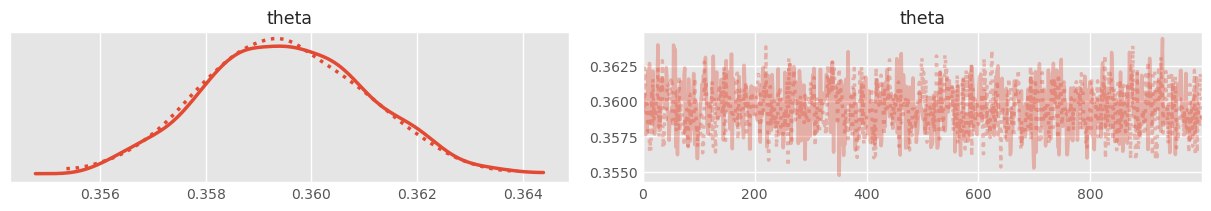

In [115]:
az.plot_trace(trace, var_names=["theta"]);

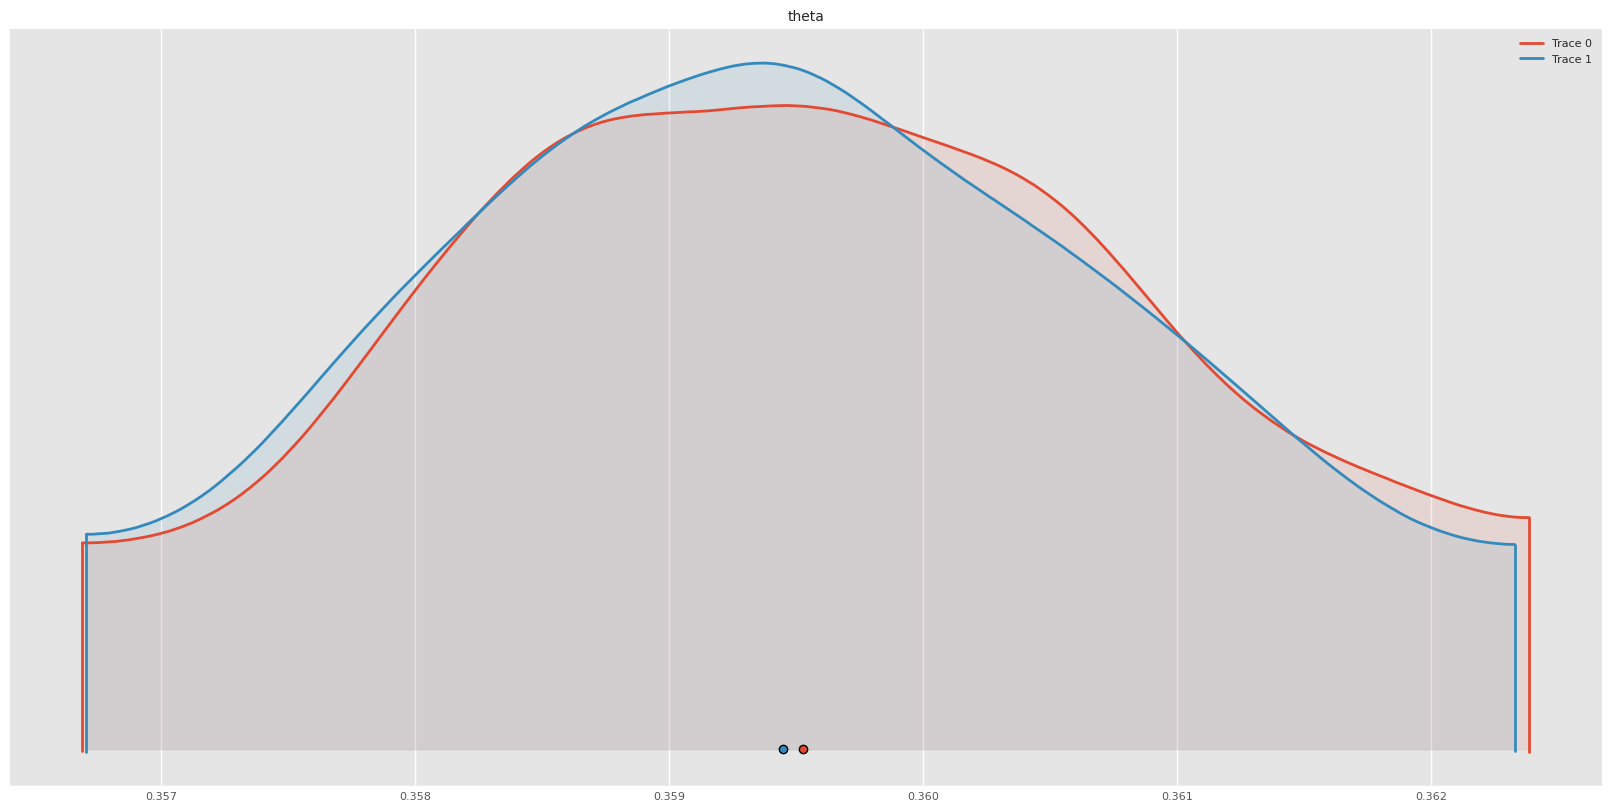

In [57]:
az.plot_density(
    [trace.posterior.theta[0,:],trace.posterior.theta[1,:]],
    data_labels=["Trace 0", "Trace 1"],
    var_names=["theta"],
    shade=0.1,
)
plt.show()

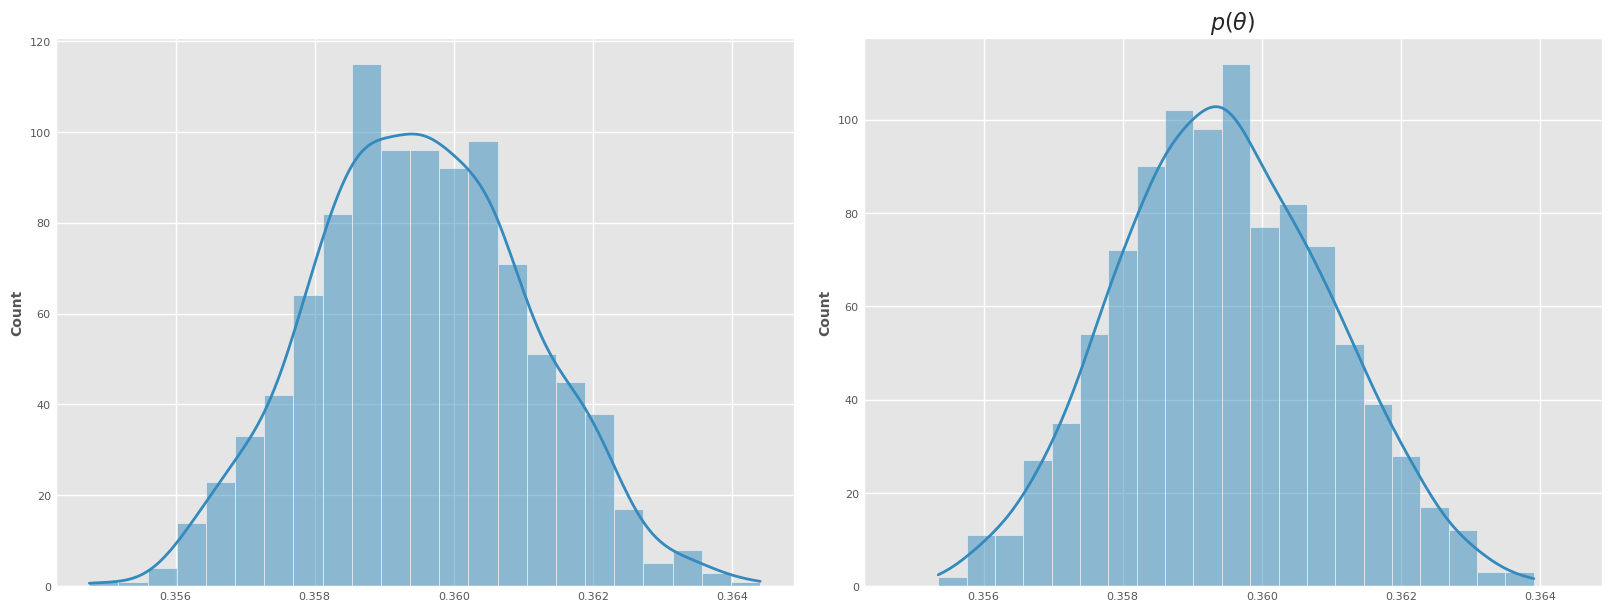

In [107]:
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(16,6))
sns.histplot(ax=ax1, data=trace.posterior.theta[0,:], kde=True)
sns.histplot(ax=ax2, data=trace.posterior.theta[1,:], kde=True)
plt.title(r'$p(\theta)$', fontsize=16)
plt.show()

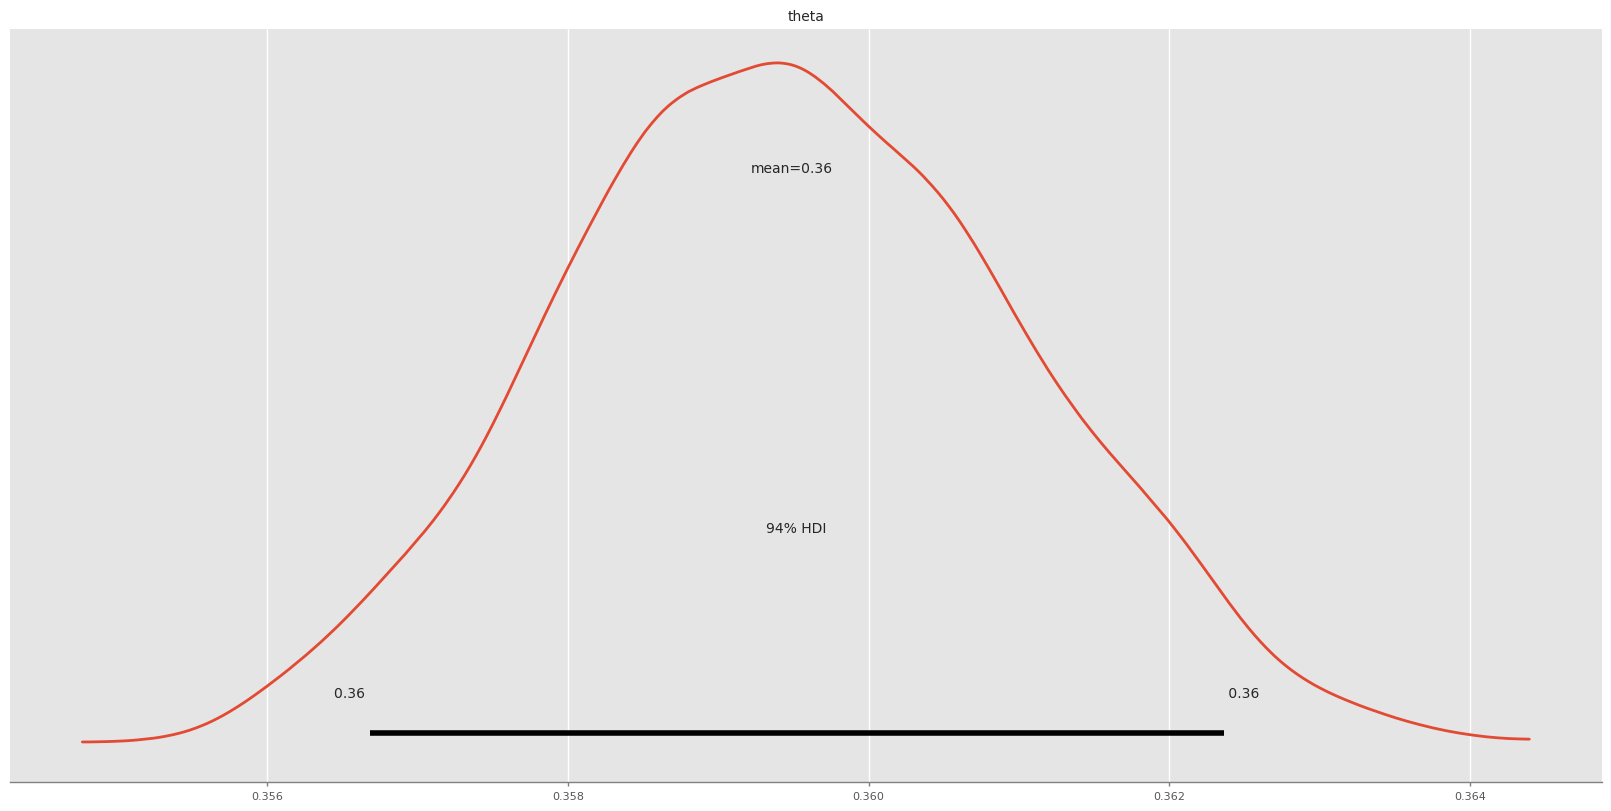

In [118]:
az.plot_posterior(trace, var_names=('theta'));

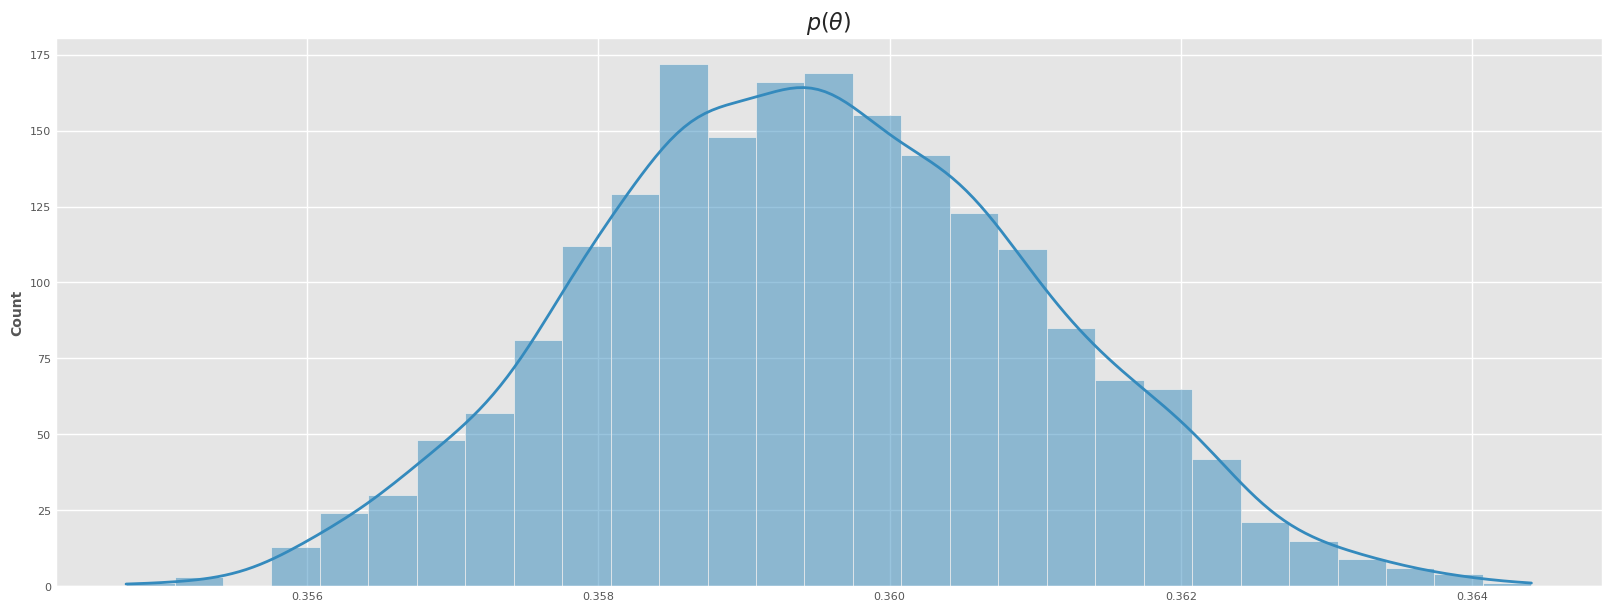

In [126]:
fig = plt.figure(figsize=(16,6))
sns.histplot(data=np.concatenate((trace.posterior.theta[0,:], trace.posterior.theta[1,:])), kde=True)
plt.title(r'$p(\theta)$', fontsize=16)
plt.show()